<a href="https://colab.research.google.com/github/FeeshX/UMBC_Data601/blob/master/Assignment/Housing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **The Housing Market During the COVID-19 Pandemic**
**Exploratory Analysis**

In [ ]:
#Mounting data file from local Google Drive

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Converting the file from .tsv to .csv for ease of data analyis. 
#Tab Separated Values (TSV)and Comma Separated Values (CSV) are the two file type extensions used to load a set of data. A .tsv file will have tab separated values whereas .csv file has comma separated fields. 

import pandas as pd
tsv_file='/content/drive/My Drive/weekly_housing_market_data_most_recent.tsv'
housing_df = pd.read_table(tsv_file,sep='\t')
housing_df.to_csv('housing.csv',index=False)

In [ ]:
housing_df.head()

,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,average_homes_sold_yoy,total_homes_sold_with_price_drops,total_homes_sold_with_price_drops_yoy,average_homes_sold_with_price_drops,average_homes_sold_with_price_drops_yoy,percent_homes_sold_with_price_drops,percent_homes_sold_with_price_drops_yoy,median_sale_price,median_sale_price_yoy,median_sale_ppsf,median_sale_ppsf_yoy,median_days_to_close,median_days_to_close_yoy,price_drops,price_drops_yoy,percent_active_listings_with_price_drops,percent_active_listings_with_price_drops_yoy,pending_sales,pending_sales_yoy,median_pending_sqft,median_pending_sqft_yoy,off_market_in_two_weeks,off_market_in_two_weeks_yoy,percent_off_market_in_two_weeks,percent_off_market_in_two_weeks_yoy,total_new_listings,total_new_listings_yoy,average_new_listings,average_new_listings_yoy,median_new_listing_price,median_new_listing_price_yoy,median_new_listing_ppsf,median_new_listing_ppsf_yoy,inventory,inventory_yoy,total_active_listings,total_active_listings_yoy,active_listings,active_listings_yoy,age_of_inventory,age_of_inventory_yoy,homes_delisted,homes_delisted_yoy,percent_active_listings_delisted,percent_active_listings_delisted_yoy,median_active_list_price,median_active_list_price_yoy,median_active_list_ppsf,median_active_list_ppsf_yoy,average_of_median_list_price_amount,average_of_median_list_price_amount_yoy,average_of_median_offer_price_amount,average_of_median_offer_price_amount_yoy,avg_offer_to_list,avg_offer_to_list_yoy,average_sale_to_list_ratio,average_sale_to_list_ratio_yoy,median_days_on_market,median_days_on_market_yoy,pending_sales_to_sales_ratio,pending_sales_to_sales_ratio_yoy,months_of_supply,months_of_supply_yoy,average_pending_sales_listing_updates,average_pending_sales_listing_updates_yoy,percent_total_price_drops_of_inventory,percent_total_price_drops_of_inventory_yoy,last_updated
0,12860,-2,"Batavia, NY metro area",metro,2019-02-18,2019-02-24,1 weeks,4.0,-0.333333,4.0,-0.333333,2.0,-0.333333,2.0,-0.333333,0.500000,0.000000,92250.0,0.156740,62.322573,0.118871,67.0,26.0,3.0,0.000000,0.039474,0.013833,4.0,0.000000,1463.5,0.180242,2.0,0.0000,0.500000,0.000000,2.0,-0.750000,2.0,-0.750000,132400.0,-0.063649,103.287189,0.052871,70.0,-0.369369,76.0,-0.350427,76.0,-0.350427,76.5,-27.5,NaN,NaN,NaN,NaN,96200.0,-0.121060,68.865321,0.020452,NaN,NaN,NaN,NaN,NaN,NaN,0.922240,-0.030994,153.0,80.0,1.000000,0.333333,19.000000,-0.500000,6.0,0.000000,0.042857,0.015830,2020-09-09 14:54:09
1,28780,-2,"Kingsville, TX metro area",metro,2019-01-28,2019-02-03,1 weeks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,0.040000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.000000,5.0,4.000000,124900.0,-0.479366,90.826446,-0.343884,48.0,2.000000,50.0,1.777778,50.0,1.777778,80.5,-48.0,2.0,0.000000,0.040000,-0.071111,149250.0,0.144555,87.517739,0.111973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.500000,0.041667,NaN,2020-09-09 14:54:09
2,2180,5,"Delaware County, OH",county,2019-04-15,2019-04-21,1 weeks,73.0,0.140625,73.0,0.140625,11.0,-0.214286,11.0,-0.214286,0.150685,-0.068065,321000.0,-0.026978,137.622150,0.027494,0.0,0.0,38.0,-0.155556,0.037512,-0.012047,52.0,-0.018868,2248.0,0.103584,5.0,-0.6875,0.096154,-0.205733,78.0,-0.303571,78.0,-0.303571,362400.0,0.115077,137.751688,0.076403,944.0,0.121140,1013.0,0.115639,1013.0,0.115639,39.0,5.0,1.0,-0.750000,0.000987,-0.003418,399900.0,0.025648,136.951107,0.026997,292450.0,NaN,298750.0,NaN,1.021499,NaN,0.995570,0.000574,46.0,1.0,0.712329,-0.115796,13.876712,-0.310788,105.0,0.179775,0.040254,-0.013190,2020-09-09 14:54:09
3,2092,5,"Surry County, NC",county,2017-11-27,2017-12-03,1 weeks,7.0,-0.222222,7.0,-0.222222,3.0,0.500000,3.0,0.500000,0.428571,0.206349,144000.0,0.014085,73.770492,-0.127118,21.0,-19.0,5.0,-0.545455,0.019305,-0.023664,3.0,-0.500000,969.0,-0.490536,0.0,-1.0000,0.000000,-0.166667,9.0,-0.307692,9.0,-0.307692,126900.0,-0.124828,93.2

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Sorting values first alphabetically by region_name and then in ascending order by period_begin
housing_df.sort_values(['region_name', 'period_begin'], ascending=[True, True], inplace=True)
housing_df

,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,average_homes_sold_yoy,total_homes_sold_with_price_drops,total_homes_sold_with_price_drops_yoy,average_homes_sold_with_price_drops,average_homes_sold_with_price_drops_yoy,percent_homes_sold_with_price_drops,percent_homes_sold_with_price_drops_yoy,median_sale_price,median_sale_price_yoy,median_sale_ppsf,median_sale_ppsf_yoy,median_days_to_close,median_days_to_close_yoy,price_drops,price_drops_yoy,percent_active_listings_with_price_drops,percent_active_listings_with_price_drops_yoy,pending_sales,pending_sales_yoy,median_pending_sqft,median_pending_sqft_yoy,off_market_in_two_weeks,off_market_in_two_weeks_yoy,percent_off_market_in_two_weeks,percent_off_market_in_two_weeks_yoy,total_new_listings,total_new_listings_yoy,average_new_listings,average_new_listings_yoy,median_new_listing_price,median_new_listing_price_yoy,median_new_listing_ppsf,median_new_listing_ppsf_yoy,inventory,inventory_yoy,total_active_listings,total_active_listings_yoy,active_listings,active_listings_yoy,age_of_inventory,age_of_inventory_yoy,homes_delisted,homes_delisted_yoy,percent_active_listings_delisted,percent_active_listings_delisted_yoy,median_active_list_price,median_active_list_price_yoy,median_active_list_ppsf,median_active_list_ppsf_yoy,average_of_median_list_price_amount,average_of_median_list_price_amount_yoy,average_of_median_offer_price_amount,average_of_median_offer_price_amount_yoy,avg_offer_to_list,avg_offer_to_list_yoy,average_sale_to_list_ratio,average_sale_to_list_ratio_yoy,median_days_on_market,median_days_on_market_yoy,pending_sales_to_sales_ratio,pending_sales_to_sales_ratio_yoy,months_of_supply,months_of_supply_yoy,average_pending_sales_listing_updates,average_pending_sales_listing_updates_yoy,percent_total_price_drops_of_inventory,percent_total_price_drops_of_inventory_yoy,last_updated
169986,10140,-2,"Aberdeen, WA metro area",metro,2017-01-02,2017-01-08,1 weeks,11.0,-0.352941,11.0,-0.352941,1.0,-0.833333,1.0,-0.833333,0.090909,-0.262032,139000.0,0.037313,73.839662,-0.131974,22.0,-22.0,14.0,-0.222222,0.033413,-0.006148,11.0,0.833333,1344.0,0.237569,6.0,5.00,0.545455,0.378788,23.0,-0.233333,23.0,-0.233333,163000.0,0.116821,133.779762,0.202603,398.0,-0.087156,419.0,-0.079121,419.0,-0.079121,124.0,10.0,7.0,1.333333,0.016706,0.010113,176000.0,0.075137,112.932692,0.015200,NaN,NaN,NaN,NaN,NaN,NaN,0.950474,0.028305,44.0,-25.0,1.000000,0.647059,38.090909,11.326203,21.0,0.235294,0.035176,-0.006109,2020-09-09 14:54:09
556913,10140,-2,"Aberdeen, WA metro area",metro,2017-01-02,2017-01-29,4 weeks,57.0,-0.287500,14.0,-0.300000,18.0,-0.454545,4.0,-0.500000,0.295136,-0.122557,178487.5,0.376953,104.222508,0.213926,45.8,3.3,15.0,-0.117647,0.035819,-0.002633,12.0,0.500000,1457.7,0.100483,5.0,1.50,0.462413,0.191579,106.0,0.039216,26.0,0.040000,161150.0,0.136760,115.112800,0.179264,392.0,-0.090487,1676.0,-0.079121,419.0,-0.079121,123.0,8.3,5.0,-0.166667,0.013127,-0.000062,177487.5,0.082901,115.389163,0.020914,NaN,NaN,NaN,NaN,NaN,NaN,0.973624,0.023271,81.7,5.7,0.910224,0.447076,30.134632,4.008844,28.0,0.272727,0.153061,-0.009352,2020-09-09 14:54:09
668951,10140,-2,"Aberdeen, WA metro area",metro,2017-01-02,2017-03-26,12 weeks,219.0,-0.017937,18.0,0.000000,73.0,-0.151163,6.0,-0.142857,0.324331,-0.075693,161804.1,0.185378,101.920738,0.170827,38.7,1.1,11.0,-0.214286,0.028618,-0.004171,12.0,0.090909,1499.7,0.044723,5.0,0.25,0.415301,0.060117,315.0,-0.051205,26.0,-0.037037,164005.0,0.122265,115.049247,0.135864,387.0,-0.100000,4955.0,-0.092158,412.0,-0.092511,112.4,8.7,3.0,-0.400000,0.009407,-0.001770,180141.6,0.106804,119.613556,0.057358,NaN,NaN,NaN,NaN,NaN,NaN,0.971107,0.018077,72.9,-20.7,0.742656,0.063869,23.936624,-3.034957,29.0,0.074074,0.366925,-0.049354,2020-09-09 14:54:09
115119,10140,-2,"Aberdeen, WA metro area",metro,2017-01-09,2017-01-15,1 weeks,17.0,-0.451613,17.0,-0.451613,8.0,-0.333333,8.0,-0.333333,0.470588,0.08

In [ ]:
# Checking the size of the dataset
housing_df.shape

(904608, 78)

In this case, the dataset has 904608 columns and 78 rows

In [ ]:
#To check the 78 rows of the dataset
list(housing_df)

['region_id',
 'region_type_id',
 'region_name',
 'region_type',
 'period_begin',
 'period_end',
 'duration',
 'total_homes_sold',
 'total_homes_sold_yoy',
 'average_homes_sold',
 'average_homes_sold_yoy',
 'total_homes_sold_with_price_drops',
 'total_homes_sold_with_price_drops_yoy',
 'average_homes_sold_with_price_drops',
 'average_homes_sold_with_price_drops_yoy',
 'percent_homes_sold_with_price_drops',
 'percent_homes_sold_with_price_drops_yoy',
 'median_sale_price',
 'median_sale_price_yoy',
 'median_sale_ppsf',
 'median_sale_ppsf_yoy',
 'median_days_to_close',
 'median_days_to_close_yoy',
 'price_drops',
 'price_drops_yoy',
 'percent_active_listings_with_price_drops',
 'percent_active_listings_with_price_drops_yoy',
 'pending_sales',
 'pending_sales_yoy',
 'median_pending_sqft',
 'median_pending_sqft_yoy',
 'off_market_in_two_weeks',
 'off_market_in_two_weeks_yoy',
 'percent_off_market_in_two_weeks',
 'percent_off_market_in_two_weeks_yoy',
 'total_new_listings',
 'total_new_listi

In [ ]:
#understanding the quality of the dataset - quantity of non-empty rows
def NaN_percent(housing_df, column_name):
    row_count = housing_df[column_name].shape[0]
    empty_values = row_count - housing_df[column_name].count()
    return (100.0*empty_values)/row_count
    
for i in list(housing_df):
    print(i +': ' + str(NaN_percent(housing_df,i))+'%')

region_id: 0.0%
region_type_id: 0.0%
region_name: 0.0%
region_type: 0.0%
period_begin: 0.0%
period_end: 0.0%
duration: 0.0%
total_homes_sold: 3.828288054052142%
total_homes_sold_yoy: 5.806382433053876%
average_homes_sold: 3.828288054052142%
average_homes_sold_yoy: 5.806382433053876%
total_homes_sold_with_price_drops: 3.828288054052142%
total_homes_sold_with_price_drops_yoy: 19.621316636598394%
average_homes_sold_with_price_drops: 3.828288054052142%
average_homes_sold_with_price_drops_yoy: 26.883025575718985%
percent_homes_sold_with_price_drops: 3.828288054052142%
percent_homes_sold_with_price_drops_yoy: 5.806382433053876%
median_sale_price: 3.828288054052142%
median_sale_price_yoy: 5.806382433053876%
median_sale_ppsf: 4.186454243163889%
median_sale_ppsf_yoy: 6.258954154727793%
median_days_to_close: 3.828288054052142%
median_days_to_close_yoy: 5.806382433053876%
price_drops: 11.030965899041353%
price_drops_yoy: 16.336910573419647%
percent_active_listings_with_price_drops: 11.03350843680

In [ ]:
#Alternative method to show null values
print(housing_df.isnull().sum().to_string())

region_id                                            0
region_type_id                                       0
region_name                                          0
region_type                                          0
period_begin                                         0
period_end                                           0
duration                                             0
total_homes_sold                                 34631
total_homes_sold_yoy                             52525
average_homes_sold                               34631
average_homes_sold_yoy                           52525
total_homes_sold_with_price_drops                34631
total_homes_sold_with_price_drops_yoy           177496
average_homes_sold_with_price_drops              34631
average_homes_sold_with_price_drops_yoy         243186
percent_homes_sold_with_price_drops              34631
percent_homes_sold_with_price_drops_yoy          52525
median_sale_price                                34631
median_sal

In [ ]:
#Selecting columns that are relevant to the research
df1 = housing_df[['region_name', 'period_begin', 'period_end', 'duration', 'total_homes_sold', 'average_homes_sold', 'inventory', 'homes_delisted']]
df1

,region_name,period_begin,period_end,duration,total_homes_sold,average_homes_sold,inventory,homes_delisted
169986,"Aberdeen, WA metro area",2017-01-02,2017-01-08,1 weeks,11.0,11.0,398.0,7.0
556913,"Aberdeen, WA metro area",2017-01-02,2017-01-29,4 weeks,57.0,14.0,392.0,5.0
668951,"Aberdeen, WA metro area",2017-01-02,2017-03-26,12 weeks,219.0,18.0,387.0,3.0
115119,"Aberdeen, WA metro area",2017-01-09,2017-01-15,1 weeks,17.0,17.0,398.0,5.0
368474,"Aberdeen, WA metro area",2017-01-09,2017-02-05,4 weeks,69.0,17.0,393.0,4.0
...,...,...,...,...,...,...,...,...
245515,"Yuma County, CO",2020-08-10,2020-08-16,1 weeks,1.0,1.0,6.0,NaN
565302,"Yuma County, CO",2020-08-10,2020-09-06,4 weeks,3.0,1.0,8.0,NaN
245533,"Yuma County, CO",2020-08-17,2020-08-23,1 weeks,1.0,1.0,8.0,NaN
60321,"Yuma County, CO",2020-08-24,2020-08-30,1 weeks,1.0,1.0,9.0,NaN


In [ ]:
#Drop the rows where at least one element is missing:
df1.dropna(inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
print(df1['region_name'].value_counts())

Pasco County, FL          562
Rutherford County, TN     562
Allegheny County, PA      562
Westchester County, NY    562
Jefferson County, AL      562
                         ... 
Sherman County, OR         35
Cheyenne County, CO        35
Mahnomen County, MN        16
Harney County, OR          11
Norman County, MN           7
Name: region_name, Length: 1527, dtype: int64


In [ ]:
print(df1['duration'].value_counts())

12 weeks    263676
4 weeks     258571
1 weeks     216586
Name: duration, dtype: int64


In [ ]:

df2 = df1.loc[housing_df["duration"] == "1 weeks"]
df2

,region_name,period_begin,period_end,duration,total_homes_sold,average_homes_sold,inventory,homes_delisted
169986,"Aberdeen, WA metro area",2017-01-02,2017-01-08,1 weeks,11.0,11.0,398.0,7.0
115119,"Aberdeen, WA metro area",2017-01-09,2017-01-15,1 weeks,17.0,17.0,398.0,5.0
235675,"Aberdeen, WA metro area",2017-01-16,2017-01-22,1 weeks,14.0,14.0,387.0,6.0
170147,"Aberdeen, WA metro area",2017-01-23,2017-01-29,1 weeks,15.0,15.0,388.0,4.0
115035,"Aberdeen, WA metro area",2017-01-30,2017-02-05,1 weeks,23.0,23.0,399.0,1.0
...,...,...,...,...,...,...,...,...
32920,"Yuma County, CO",2019-10-07,2019-10-13,1 weeks,1.0,1.0,16.0,1.0
245281,"Yuma County, CO",2019-11-25,2019-12-01,1 weeks,1.0,1.0,14.0,1.0
309624,"Yuma County, CO",2020-01-20,2020-01-26,1 weeks,2.0,2.0,15.0,1.0
85013,"Yuma County, CO",2020-01-27,2020-02-02,1 weeks,1.0,1.0,14.0,1.0


In [ ]:
df2['Year'] = df2.period_begin.apply(lambda x: x[0:7])
df2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,region_name,period_begin,period_end,duration,total_homes_sold,average_homes_sold,inventory,homes_delisted,Year
169986,"Aberdeen, WA metro area",2017-01-02,2017-01-08,1 weeks,11.0,11.0,398.0,7.0,2017-01
115119,"Aberdeen, WA metro area",2017-01-09,2017-01-15,1 weeks,17.0,17.0,398.0,5.0,2017-01
235675,"Aberdeen, WA metro area",2017-01-16,2017-01-22,1 weeks,14.0,14.0,387.0,6.0,2017-01
170147,"Aberdeen, WA metro area",2017-01-23,2017-01-29,1 weeks,15.0,15.0,388.0,4.0,2017-01
115035,"Aberdeen, WA metro area",2017-01-30,2017-02-05,1 weeks,23.0,23.0,399.0,1.0,2017-01
...,...,...,...,...,...,...,...,...,...
32920,"Yuma County, CO",2019-10-07,2019-10-13,1 weeks,1.0,1.0,16.0,1.0,2019-10
245281,"Yuma County, CO",2019-11-25,2019-12-01,1 weeks,1.0,1.0,14.0,1.0,2019-11
309624,"Yuma County, CO",2020-01-20,2020-01-26,1 weeks,2.0,2.0,15.0,1.0,2020-01
85013,"Yuma County, CO",2020-01-27,2020-02-02,1 weeks,1.0,1.0,14.0,1.0,2020-01


In [ ]:
df2.sort_values(['region_name', 'period_begin'], ascending=[True, True], inplace=True)
df2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,region_name,period_begin,period_end,duration,total_homes_sold,average_homes_sold,inventory,homes_delisted,Year
169986,"Aberdeen, WA metro area",2017-01-02,2017-01-08,1 weeks,11.0,11.0,398.0,7.0,2017-01
115119,"Aberdeen, WA metro area",2017-01-09,2017-01-15,1 weeks,17.0,17.0,398.0,5.0,2017-01
235675,"Aberdeen, WA metro area",2017-01-16,2017-01-22,1 weeks,14.0,14.0,387.0,6.0,2017-01
170147,"Aberdeen, WA metro area",2017-01-23,2017-01-29,1 weeks,15.0,15.0,388.0,4.0,2017-01
115035,"Aberdeen, WA metro area",2017-01-30,2017-02-05,1 weeks,23.0,23.0,399.0,1.0,2017-01


In [ ]:
counties_by_total = df2.pivot_table(index='period_begin', columns='region_name', values='total_homes_sold', aggfunc='sum')
counties_by_total

region_name,"Aberdeen, WA metro area","Abilene, TX metro area","Adair County, OK","Adams County, CO","Adams County, ID","Adams County, OH","Adams County, PA","Adams County, WI","Addison County, VT","Adrian, MI metro area","Aitkin County, MN","Akron, OH metro area","Alameda County, CA","Albany County, NY","Albany, NY metro area","Albany, OR metro area","Albemarle, NC metro area","Albert Lea, MN metro area","Albertville, AL metro area","Alexander County, NC","Alexandria, MN metro area","Alexandria, VA","Alice, TX metro area",All Redfin Metros,"Allegan County, MI","Allegany County, MD","Allegany County, NY","Allegheny County, PA","Allentown, PA metro area","Alma, MI metro area","Amador County, CA","Amsterdam, NY metro area","Anaheim, CA metro area","Anchorage Borough, AK","Anchorage, AK metro area","Anderson County, KY","Anderson County, SC","Anderson County, TN","Andrew County, MO","Androscoggin County, ME",...,"Willmar, MN metro area","Wilmington, DE metro area","Wilmington, OH metro area","Wilson County, TN","Winchester, VA","Winchester, VA metro area","Windham County, CT","Windham County, VT","Windsor County, VT","Winnebago County, IL","Winnebago County, WI","Winnemucca, NV metro area","Winona County, MN","Winona, MN metro area","Winston-Salem, NC metro area","Wisconsin Rapids, WI metro area","Wolfe County, KY","Wood County, WI","Woodford County, KY","Woodruff County, AR","Wooster, OH metro area","Worcester County, MA","Worcester County, MD","Worcester, MA metro area","Worthington, MN metro area","Wright County, MN","Wyandotte County, KS","Wyoming County, NY","Yadkin County, NC","Yamhill County, OR","Yancey County, NC","Yellow Medicine County, MN","Yolo County, CA","York County, ME","York County, PA","York County, VA","York, PA metro area","Young County, TX","Youngstown, OH metro area","Yuma County, CO"
period_begin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-02,11.0,14.0,NaN,78.0,NaN,1.0,9.0,7.0,3.0,14.0,6.0,80.0,147.0,40.0,115.0,28.0,6.0,3.0,NaN,NaN,NaN,27.0,NaN,34243.0,10.0,3.0,4.0,162.0,83.0,NaN,NaN,5.0,390.0,43.0,63.0,4.0,22.0,11.0,NaN,8.0,...,5.0,81.0,NaN,38.0,5.0,17.0,22.0,6.0,11.0,24.0,18.0,NaN,NaN,NaN,94.0,3.0,NaN,3.0,3.0,NaN,8.0,109.0,23.0,131.0,NaN,28.0,15.0,5.0,NaN,21.0,5.0,NaN,28.0,43.0,42.0,7.0,42.0,NaN,48.0,NaN
2017-01-09,17.0,31.0,NaN,127.0,NaN,NaN,18.0,4.0,3.0,22.0,3.0,111.0,178.0,59.0,161.0,39.0,6.0,6.0,NaN,NaN,5.0,29.0,NaN,45193.0,16.0,11.0,4.0,202.0,117.0,NaN,8.0,9.0,446.0,57.0,84.0,6.0,34.0,NaN,NaN,18.0,...,4.0,104.0,3.0,30.0,6.0,32.0,28.0,9.0,12.0,26.0,25.0,NaN,NaN,NaN,124.0,11.0,NaN,11.0,7.0,NaN,12.0,163.0,27.0,191.0,NaN,24.0,24.0,4.0,NaN,23.0,2.0,NaN,25.0,51.0,81.0,4.0,81.0,NaN,63.0,NaN
2017-01-16,14.0,27.0,NaN,110.0,NaN,2.0,13.0,6.0,6.0,21.0,2.0,113.0,162.0,46.0,133.0,30.0,10.0,3.0,NaN,NaN,NaN,29.0,NaN,42580.0,19.0,9.0,3.0,175.0,107.0,NaN,12.0,4.0,410.0,46.0,68.0,NaN,26.0,NaN,NaN,12.0,...,6.0,113.0,5.0,28.0,6.0,18.0,24.0,9.0,12.0,24.0,26.0,NaN,NaN,NaN,111.0,13.0,NaN,13.0,2.0,NaN,NaN,127.0,19.0,151.0,NaN,29.0,21.0,4.0,NaN,21.0,3.0,NaN,24.0,51.0,70.0,6.0,70.0,1.0,61.0,NaN
2017-01-23,15.0,30.0,NaN,142.0,NaN,NaN,15.0,7.0,5.0,20.0,NaN,131.0,169.0,49.0,134.0,33.0,10.0,NaN,NaN,NaN,NaN,35.0,NaN,47052.0,21.0,7.0,5.0,190.0,161.0,NaN,NaN,4.0,434.0,56.0,82.0,4.0,26.0,NaN,NaN,16.0,...,5.0,152.0,3.0,51.0,NaN,31.0,29.0,13.0,10.0,25.0,18.0,NaN,8.0,8.0,127.0,6.0,NaN,6.0,NaN,NaN,NaN,136.0,26.0,165.0,NaN,25.0,15.0,NaN,NaN,25.0,5.0,NaN,36.0,37.0,91.0,13.0,91.0,NaN,78.0,NaN
2017-01-30,23.0,44.0,NaN,141.0,NaN,1.0,20.0,4.0,7.0,21.0,5.0,143.0,141.0,48.0,183.0,38.0,9.0,5.0,NaN,NaN,4.0,33.0,NaN,54482.0,21.0,15.0,6.0,207.0,147.0,NaN,6.0,2.0,485.0,66.0,92.0,6.0,41.0,NaN,NaN,14.0,...,9.0,152.0,9.0,48.0,7.0,32.0,27.0,11.0,9.0,28.0,26.0,NaN,NaN,NaN,137.0,18.0,NaN,18.0,7.0,NaN,17.0,150.0,28.0,177.0,NaN,31.0,26.0,6.0,3.0,25.0,8.0,NaN,27.0,56.0,101.0,15.0,101.0,5.0,81.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
counties_by_total['sum'] = counties_by_total.sum(numeric_only=True, axis=1)
counties_by_total

region_name,"Aberdeen, WA metro area","Abilene, TX metro area","Adair County, OK","Adams County, CO","Adams County, ID","Adams County, OH","Adams County, PA","Adams County, WI","Addison County, VT","Adrian, MI metro area","Aitkin County, MN","Akron, OH metro area","Alameda County, CA","Albany County, NY","Albany, NY metro area","Albany, OR metro area","Albemarle, NC metro area","Albert Lea, MN metro area","Albertville, AL metro area","Alexander County, NC","Alexandria, MN metro area","Alexandria, VA","Alice, TX metro area",All Redfin Metros,"Allegan County, MI","Allegany County, MD","Allegany County, NY","Allegheny County, PA","Allentown, PA metro area","Alma, MI metro area","Amador County, CA","Amsterdam, NY metro area","Anaheim, CA metro area","Anchorage Borough, AK","Anchorage, AK metro area","Anderson County, KY","Anderson County, SC","Anderson County, TN","Andrew County, MO","Androscoggin County, ME",...,"Wilmington, DE metro area","Wilmington, OH metro area","Wilson County, TN","Winchester, VA","Winchester, VA metro area","Windham County, CT","Windham County, VT","Windsor County, VT","Winnebago County, IL","Winnebago County, WI","Winnemucca, NV metro area","Winona County, MN","Winona, MN metro area","Winston-Salem, NC metro area","Wisconsin Rapids, WI metro area","Wolfe County, KY","Wood County, WI","Woodford County, KY","Woodruff County, AR","Wooster, OH metro area","Worcester County, MA","Worcester County, MD","Worcester, MA metro area","Worthington, MN metro area","Wright County, MN","Wyandotte County, KS","Wyoming County, NY","Yadkin County, NC","Yamhill County, OR","Yancey County, NC","Yellow Medicine County, MN","Yolo County, CA","York County, ME","York County, PA","York County, VA","York, PA metro area","Young County, TX","Youngstown, OH metro area","Yuma County, CO",sum
period_begin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-02,11.0,14.0,NaN,78.0,NaN,1.0,9.0,7.0,3.0,14.0,6.0,80.0,147.0,40.0,115.0,28.0,6.0,3.0,NaN,NaN,NaN,27.0,NaN,34243.0,10.0,3.0,4.0,162.0,83.0,NaN,NaN,5.0,390.0,43.0,63.0,4.0,22.0,11.0,NaN,8.0,...,81.0,NaN,38.0,5.0,17.0,22.0,6.0,11.0,24.0,18.0,NaN,NaN,NaN,94.0,3.0,NaN,3.0,3.0,NaN,8.0,109.0,23.0,131.0,NaN,28.0,15.0,5.0,NaN,21.0,5.0,NaN,28.0,43.0,42.0,7.0,42.0,NaN,48.0,NaN,95105.0
2017-01-09,17.0,31.0,NaN,127.0,NaN,NaN,18.0,4.0,3.0,22.0,3.0,111.0,178.0,59.0,161.0,39.0,6.0,6.0,NaN,NaN,5.0,29.0,NaN,45193.0,16.0,11.0,4.0,202.0,117.0,NaN,8.0,9.0,446.0,57.0,84.0,6.0,34.0,NaN,NaN,18.0,...,104.0,3.0,30.0,6.0,32.0,28.0,9.0,12.0,26.0,25.0,NaN,NaN,NaN,124.0,11.0,NaN,11.0,7.0,NaN,12.0,163.0,27.0,191.0,NaN,24.0,24.0,4.0,NaN,23.0,2.0,NaN,25.0,51.0,81.0,4.0,81.0,NaN,63.0,NaN,125247.0
2017-01-16,14.0,27.0,NaN,110.0,NaN,2.0,13.0,6.0,6.0,21.0,2.0,113.0,162.0,46.0,133.0,30.0,10.0,3.0,NaN,NaN,NaN,29.0,NaN,42580.0,19.0,9.0,3.0,175.0,107.0,NaN,12.0,4.0,410.0,46.0,68.0,NaN,26.0,NaN,NaN,12.0,...,113.0,5.0,28.0,6.0,18.0,24.0,9.0,12.0,24.0,26.0,NaN,NaN,NaN,111.0,13.0,NaN,13.0,2.0,NaN,NaN,127.0,19.0,151.0,NaN,29.0,21.0,4.0,NaN,21.0,3.0,NaN,24.0,51.0,70.0,6.0,70.0,1.0,61.0,NaN,117509.0
2017-01-23,15.0,30.0,NaN,142.0,NaN,NaN,15.0,7.0,5.0,20.0,NaN,131.0,169.0,49.0,134.0,33.0,10.0,NaN,NaN,NaN,NaN,35.0,NaN,47052.0,21.0,7.0,5.0,190.0,161.0,NaN,NaN,4.0,434.0,56.0,82.0,4.0,26.0,NaN,NaN,16.0,...,152.0,3.0,51.0,NaN,31.0,29.0,13.0,10.0,25.0,18.0,NaN,8.0,8.0,127.0,6.0,NaN,6.0,NaN,NaN,NaN,136.0,26.0,165.0,NaN,25.0,15.0,NaN,NaN,25.0,5.0,NaN,36.0,37.0,91.0,13.0,91.0,NaN,78.0,NaN,129584.0
2017-01-30,23.0,44.0,NaN,141.0,NaN,1.0,20.0,4.0,7.0,21.0,5.0,143.0,141.0,48.0,183.0,38.0,9.0,5.0,NaN,NaN,4.0,33.0,NaN,54482.0,21.0,15.0,6.0,207.0,147.0,NaN,6.0,2.0,485.0,66.0,92.0,6.0,41.0,NaN,NaN,14.0,...,152.0,9.0,48.0,7.0,32.0,27.0,11.0,9.0,28.0,26.0,NaN,NaN,NaN,137.0,18.0,NaN,18.0,7.0,NaN,17.0,150.0,28.0,177.0,NaN,31.0,26.0,6.0,3.0,25.0,8.0,NaN,27.0,56.0,101.0,15.0,101.0,5.0,81.0,NaN,150770.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

Text(0.5, 0, 'Time Period')

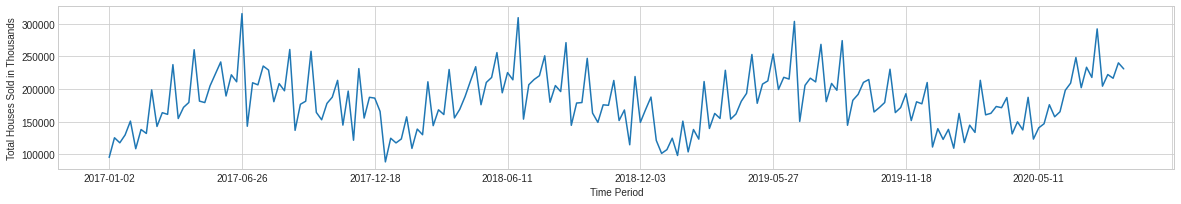

In [ ]:
counties_by_total['sum'].plot(figsize=(20,3))
plt.ylabel('Total Houses Sold in Thousands')
plt.xlabel('Time Period')

In [ ]:
counties_by_inventory = df2.pivot_table(index='period_begin', columns='region_name', values='inventory', aggfunc='sum')
counties_by_inventory

region_name,"Aberdeen, WA metro area","Abilene, TX metro area","Adair County, OK","Adams County, CO","Adams County, ID","Adams County, OH","Adams County, PA","Adams County, WI","Addison County, VT","Adrian, MI metro area","Aitkin County, MN","Akron, OH metro area","Alameda County, CA","Albany County, NY","Albany, NY metro area","Albany, OR metro area","Albemarle, NC metro area","Albert Lea, MN metro area","Albertville, AL metro area","Alexander County, NC","Alexandria, MN metro area","Alexandria, VA","Alice, TX metro area",All Redfin Metros,"Allegan County, MI","Allegany County, MD","Allegany County, NY","Allegheny County, PA","Allentown, PA metro area","Alma, MI metro area","Amador County, CA","Amsterdam, NY metro area","Anaheim, CA metro area","Anchorage Borough, AK","Anchorage, AK metro area","Anderson County, KY","Anderson County, SC","Anderson County, TN","Andrew County, MO","Androscoggin County, ME",...,"Willmar, MN metro area","Wilmington, DE metro area","Wilmington, OH metro area","Wilson County, TN","Winchester, VA","Winchester, VA metro area","Windham County, CT","Windham County, VT","Windsor County, VT","Winnebago County, IL","Winnebago County, WI","Winnemucca, NV metro area","Winona County, MN","Winona, MN metro area","Winston-Salem, NC metro area","Wisconsin Rapids, WI metro area","Wolfe County, KY","Wood County, WI","Woodford County, KY","Woodruff County, AR","Wooster, OH metro area","Worcester County, MA","Worcester County, MD","Worcester, MA metro area","Worthington, MN metro area","Wright County, MN","Wyandotte County, KS","Wyoming County, NY","Yadkin County, NC","Yamhill County, OR","Yancey County, NC","Yellow Medicine County, MN","Yolo County, CA","York County, ME","York County, PA","York County, VA","York, PA metro area","Young County, TX","Youngstown, OH metro area","Yuma County, CO"
period_begin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-02,398.0,597.0,NaN,688.0,NaN,89.0,478.0,249.0,185.0,354.0,140.0,2557.0,925.0,851.0,3239.0,381.0,300.0,108.0,NaN,NaN,NaN,348.0,NaN,854758.0,371.0,397.0,184.0,5293.0,2781.0,NaN,NaN,155.0,6072.0,1276.0,2005.0,91.0,868.0,311.0,NaN,360.0,...,224.0,3140.0,NaN,699.0,62.0,553.0,461.0,581.0,744.0,560.0,609.0,NaN,NaN,NaN,2602.0,290.0,NaN,290.0,84.0,NaN,235.0,2030.0,1117.0,2491.0,NaN,406.0,441.0,107.0,NaN,269.0,221.0,NaN,224.0,975.0,1865.0,259.0,1865.0,NaN,1756.0,NaN
2017-01-09,398.0,618.0,NaN,669.0,NaN,NaN,477.0,252.0,182.0,346.0,139.0,2520.0,985.0,851.0,3231.0,386.0,305.0,106.0,NaN,NaN,120.0,352.0,NaN,857079.0,364.0,389.0,181.0,5248.0,2752.0,NaN,110.0,154.0,6144.0,1278.0,2009.0,91.0,871.0,NaN,NaN,367.0,...,221.0,3127.0,147.0,724.0,62.0,557.0,456.0,585.0,741.0,538.0,603.0,NaN,NaN,NaN,2586.0,290.0,NaN,290.0,86.0,NaN,236.0,2032.0,1120.0,2488.0,NaN,402.0,451.0,108.0,NaN,250.0,222.0,NaN,226.0,954.0,1849.0,261.0,1849.0,NaN,1782.0,NaN
2017-01-16,387.0,618.0,NaN,647.0,NaN,80.0,478.0,255.0,178.0,352.0,138.0,2536.0,1013.0,824.0,3184.0,374.0,299.0,105.0,NaN,NaN,NaN,335.0,NaN,860112.0,362.0,386.0,175.0,5281.0,2733.0,NaN,109.0,154.0,6277.0,1302.0,2030.0,NaN,866.0,NaN,NaN,362.0,...,224.0,3131.0,146.0,741.0,57.0,556.0,451.0,579.0,740.0,537.0,604.0,NaN,NaN,NaN,2605.0,279.0,NaN,279.0,85.0,NaN,NaN,2017.0,1140.0,2468.0,NaN,399.0,462.0,105.0,NaN,241.0,219.0,NaN,222.0,949.0,1847.0,252.0,1847.0,82.0,1777.0,NaN
2017-01-23,388.0,636.0,NaN,633.0,NaN,NaN,487.0,257.0,180.0,352.0,NaN,2525.0,1039.0,828.0,3143.0,360.0,305.0,NaN,NaN,NaN,NaN,337.0,NaN,861864.0,348.0,379.0,179.0,5295.0,2717.0,NaN,NaN,150.0,6364.0,1323.0,2054.0,88.0,890.0,NaN,NaN,356.0,...,227.0,3113.0,155.0,736.0,NaN,551.0,457.0,577.0,733.0,533.0,608.0,NaN,134.0,134.0,2639.0,278.0,NaN,278.0,NaN,NaN,NaN,1969.0,1167.0,2426.0,NaN,403.0,456.0,NaN,NaN,234.0,212.0,NaN,216.0,928.0,1846.0,274.0,1846.0,NaN,1744.0,NaN
2017-01-30,399.0,622.0,NaN,620.0,NaN,84.0,466.0,257.0,178.0,360.0,146.0,2525.0,1046.0,814.0,3083.0,350.0,302.0,102.0,NaN,NaN,111.0,334.0,NaN,863970.0,357.0,382.0,173.0,5328.0,2732.0,NaN,108.0,157.

In [ ]:
counties_by_inventory['sum'] = counties_by_inventory.sum(numeric_only=True, axis=1)
counties_by_inventory

region_name,"Aberdeen, WA metro area","Abilene, TX metro area","Adair County, OK","Adams County, CO","Adams County, ID","Adams County, OH","Adams County, PA","Adams County, WI","Addison County, VT","Adrian, MI metro area","Aitkin County, MN","Akron, OH metro area","Alameda County, CA","Albany County, NY","Albany, NY metro area","Albany, OR metro area","Albemarle, NC metro area","Albert Lea, MN metro area","Albertville, AL metro area","Alexander County, NC","Alexandria, MN metro area","Alexandria, VA","Alice, TX metro area",All Redfin Metros,"Allegan County, MI","Allegany County, MD","Allegany County, NY","Allegheny County, PA","Allentown, PA metro area","Alma, MI metro area","Amador County, CA","Amsterdam, NY metro area","Anaheim, CA metro area","Anchorage Borough, AK","Anchorage, AK metro area","Anderson County, KY","Anderson County, SC","Anderson County, TN","Andrew County, MO","Androscoggin County, ME",...,"Wilmington, DE metro area","Wilmington, OH metro area","Wilson County, TN","Winchester, VA","Winchester, VA metro area","Windham County, CT","Windham County, VT","Windsor County, VT","Winnebago County, IL","Winnebago County, WI","Winnemucca, NV metro area","Winona County, MN","Winona, MN metro area","Winston-Salem, NC metro area","Wisconsin Rapids, WI metro area","Wolfe County, KY","Wood County, WI","Woodford County, KY","Woodruff County, AR","Wooster, OH metro area","Worcester County, MA","Worcester County, MD","Worcester, MA metro area","Worthington, MN metro area","Wright County, MN","Wyandotte County, KS","Wyoming County, NY","Yadkin County, NC","Yamhill County, OR","Yancey County, NC","Yellow Medicine County, MN","Yolo County, CA","York County, ME","York County, PA","York County, VA","York, PA metro area","Young County, TX","Youngstown, OH metro area","Yuma County, CO",sum
period_begin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-02,398.0,597.0,NaN,688.0,NaN,89.0,478.0,249.0,185.0,354.0,140.0,2557.0,925.0,851.0,3239.0,381.0,300.0,108.0,NaN,NaN,NaN,348.0,NaN,854758.0,371.0,397.0,184.0,5293.0,2781.0,NaN,NaN,155.0,6072.0,1276.0,2005.0,91.0,868.0,311.0,NaN,360.0,...,3140.0,NaN,699.0,62.0,553.0,461.0,581.0,744.0,560.0,609.0,NaN,NaN,NaN,2602.0,290.0,NaN,290.0,84.0,NaN,235.0,2030.0,1117.0,2491.0,NaN,406.0,441.0,107.0,NaN,269.0,221.0,NaN,224.0,975.0,1865.0,259.0,1865.0,NaN,1756.0,NaN,2365409.0
2017-01-09,398.0,618.0,NaN,669.0,NaN,NaN,477.0,252.0,182.0,346.0,139.0,2520.0,985.0,851.0,3231.0,386.0,305.0,106.0,NaN,NaN,120.0,352.0,NaN,857079.0,364.0,389.0,181.0,5248.0,2752.0,NaN,110.0,154.0,6144.0,1278.0,2009.0,91.0,871.0,NaN,NaN,367.0,...,3127.0,147.0,724.0,62.0,557.0,456.0,585.0,741.0,538.0,603.0,NaN,NaN,NaN,2586.0,290.0,NaN,290.0,86.0,NaN,236.0,2032.0,1120.0,2488.0,NaN,402.0,451.0,108.0,NaN,250.0,222.0,NaN,226.0,954.0,1849.0,261.0,1849.0,NaN,1782.0,NaN,2374775.0
2017-01-16,387.0,618.0,NaN,647.0,NaN,80.0,478.0,255.0,178.0,352.0,138.0,2536.0,1013.0,824.0,3184.0,374.0,299.0,105.0,NaN,NaN,NaN,335.0,NaN,860112.0,362.0,386.0,175.0,5281.0,2733.0,NaN,109.0,154.0,6277.0,1302.0,2030.0,NaN,866.0,NaN,NaN,362.0,...,3131.0,146.0,741.0,57.0,556.0,451.0,579.0,740.0,537.0,604.0,NaN,NaN,NaN,2605.0,279.0,NaN,279.0,85.0,NaN,NaN,2017.0,1140.0,2468.0,NaN,399.0,462.0,105.0,NaN,241.0,219.0,NaN,222.0,949.0,1847.0,252.0,1847.0,82.0,1777.0,NaN,2376837.0
2017-01-23,388.0,636.0,NaN,633.0,NaN,NaN,487.0,257.0,180.0,352.0,NaN,2525.0,1039.0,828.0,3143.0,360.0,305.0,NaN,NaN,NaN,NaN,337.0,NaN,861864.0,348.0,379.0,179.0,5295.0,2717.0,NaN,NaN,150.0,6364.0,1323.0,2054.0,88.0,890.0,NaN,NaN,356.0,...,3113.0,155.0,736.0,NaN,551.0,457.0,577.0,733.0,533.0,608.0,NaN,134.0,134.0,2639.0,278.0,NaN,278.0,NaN,NaN,NaN,1969.0,1167.0,2426.0,NaN,403.0,456.0,NaN,NaN,234.0,212.0,NaN,216.0,928.0,1846.0,274.0,1846.0,NaN,1744.0,NaN,2379140.0
2017-01-30,399.0,622.0,NaN,620.0,NaN,84.0,466.0,257.0,178.0,360.0,146.0,2525.0,1046.0,814.0,3083.0,350.0,302.0,102.0,NaN,NaN,111.0,334.0,NaN,863970.0,357.0,382.0,173.0,5328.0,2732.0,NaN,108.0,157.0,646

Text(0.5, 0, 'Time Period')

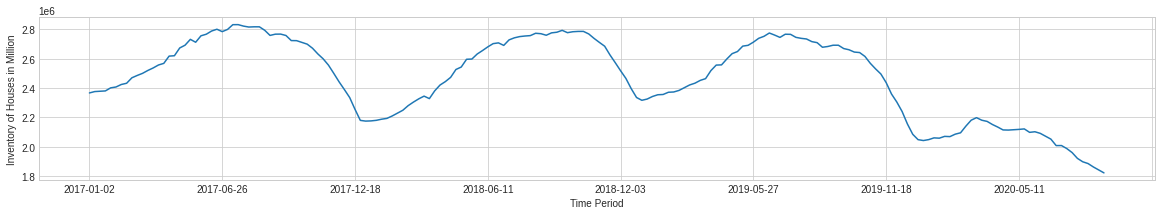

In [ ]:
counties_by_inventory['sum'].plot(figsize=(20,3))
plt.ylabel('Inventory of Houses in Million')
plt.xlabel('Time Period')

In [ ]:
counties_homesdelisted = df2.pivot_table(index='period_begin', columns='region_name', values='homes_delisted', aggfunc='sum')
counties_homesdelisted

region_name,"Aberdeen, WA metro area","Abilene, TX metro area","Adair County, OK","Adams County, CO","Adams County, ID","Adams County, OH","Adams County, PA","Adams County, WI","Addison County, VT","Adrian, MI metro area","Aitkin County, MN","Akron, OH metro area","Alameda County, CA","Albany County, NY","Albany, NY metro area","Albany, OR metro area","Albemarle, NC metro area","Albert Lea, MN metro area","Albertville, AL metro area","Alexander County, NC","Alexandria, MN metro area","Alexandria, VA","Alice, TX metro area",All Redfin Metros,"Allegan County, MI","Allegany County, MD","Allegany County, NY","Allegheny County, PA","Allentown, PA metro area","Alma, MI metro area","Amador County, CA","Amsterdam, NY metro area","Anaheim, CA metro area","Anchorage Borough, AK","Anchorage, AK metro area","Anderson County, KY","Anderson County, SC","Anderson County, TN","Andrew County, MO","Androscoggin County, ME",...,"Willmar, MN metro area","Wilmington, DE metro area","Wilmington, OH metro area","Wilson County, TN","Winchester, VA","Winchester, VA metro area","Windham County, CT","Windham County, VT","Windsor County, VT","Winnebago County, IL","Winnebago County, WI","Winnemucca, NV metro area","Winona County, MN","Winona, MN metro area","Winston-Salem, NC metro area","Wisconsin Rapids, WI metro area","Wolfe County, KY","Wood County, WI","Woodford County, KY","Woodruff County, AR","Wooster, OH metro area","Worcester County, MA","Worcester County, MD","Worcester, MA metro area","Worthington, MN metro area","Wright County, MN","Wyandotte County, KS","Wyoming County, NY","Yadkin County, NC","Yamhill County, OR","Yancey County, NC","Yellow Medicine County, MN","Yolo County, CA","York County, ME","York County, PA","York County, VA","York, PA metro area","Young County, TX","Youngstown, OH metro area","Yuma County, CO"
period_begin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-02,7.0,8.0,NaN,8.0,NaN,2.0,3.0,4.0,6.0,11.0,4.0,41.0,23.0,11.0,51.0,4.0,11.0,1.0,NaN,NaN,NaN,5.0,NaN,12483.0,14.0,7.0,1.0,27.0,53.0,NaN,NaN,1.0,99.0,14.0,21.0,1.0,12.0,1.0,NaN,10.0,...,4.0,73.0,NaN,10.0,2.0,12.0,27.0,9.0,24.0,10.0,6.0,NaN,NaN,NaN,80.0,8.0,NaN,8.0,4.0,NaN,3.0,35.0,12.0,62.0,NaN,7.0,7.0,1.0,NaN,3.0,21.0,NaN,2.0,37.0,9.0,3.0,9.0,NaN,17.0,NaN
2017-01-09,5.0,5.0,NaN,11.0,NaN,NaN,4.0,2.0,1.0,5.0,2.0,61.0,25.0,10.0,38.0,4.0,2.0,2.0,NaN,NaN,1.0,6.0,NaN,10715.0,8.0,7.0,1.0,39.0,49.0,NaN,1.0,3.0,77.0,17.0,29.0,2.0,20.0,NaN,NaN,2.0,...,4.0,47.0,3.0,7.0,2.0,5.0,7.0,5.0,6.0,32.0,15.0,NaN,NaN,NaN,19.0,1.0,NaN,1.0,2.0,NaN,2.0,40.0,8.0,47.0,NaN,6.0,3.0,2.0,NaN,4.0,2.0,NaN,7.0,12.0,8.0,4.0,8.0,NaN,16.0,NaN
2017-01-16,6.0,14.0,NaN,6.0,NaN,2.0,3.0,1.0,3.0,3.0,2.0,32.0,23.0,11.0,47.0,2.0,1.0,2.0,NaN,NaN,NaN,2.0,NaN,9958.0,5.0,3.0,4.0,26.0,49.0,NaN,2.0,1.0,66.0,12.0,20.0,NaN,7.0,NaN,NaN,4.0,...,1.0,21.0,2.0,18.0,2.0,7.0,7.0,4.0,5.0,14.0,7.0,NaN,NaN,NaN,30.0,2.0,NaN,2.0,1.0,NaN,NaN,44.0,4.0,51.0,NaN,4.0,5.0,2.0,NaN,1.0,1.0,NaN,4.0,14.0,18.0,6.0,18.0,1.0,18.0,NaN
2017-01-23,4.0,6.0,NaN,4.0,NaN,NaN,2.0,3.0,2.0,3.0,NaN,33.0,21.0,9.0,47.0,1.0,1.0,NaN,NaN,NaN,NaN,3.0,NaN,9831.0,3.0,4.0,2.0,32.0,47.0,NaN,NaN,1.0,82.0,9.0,13.0,1.0,11.0,NaN,NaN,13.0,...,1.0,30.0,2.0,3.0,NaN,2.0,2.0,3.0,4.0,9.0,4.0,NaN,1.0,1.0,19.0,3.0,NaN,3.0,NaN,NaN,NaN,44.0,6.0,46.0,NaN,7.0,4.0,NaN,NaN,3.0,4.0,NaN,7.0,16.0,17.0,3.0,17.0,NaN,23.0,NaN
2017-01-30,1.0,13.0,NaN,7.0,NaN,1.0,6.0,3.0,4.0,7.0,1.0,40.0,24.0,22.0,67.0,2.0,9.0,2.0,NaN,NaN,1.0,6.0,NaN,12757.0,3.0,6.0,2.0,39.0,37.0,NaN,1.0,1.0,104.0,19.0,26.0,1.0,12.0,NaN,NaN,8.0,...,3.0,50.0,7.0,13.0,1.0,12.0,10.0,4.0,12.0,20.0,11.0,NaN,NaN,NaN,39.0,1.0,NaN,1.0,3.0,NaN,8.0,44.0,10.0,54.0,NaN,3.0,2.0,2.0,2.0,1.0,3.0,NaN,4.0,18.0,43.0,1.0,43.0,2.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
counties_homesdelisted['sum'] = counties_homesdelisted.sum(numeric_only=True, axis=1)
counties_homesdelisted

region_name,"Aberdeen, WA metro area","Abilene, TX metro area","Adair County, OK","Adams County, CO","Adams County, ID","Adams County, OH","Adams County, PA","Adams County, WI","Addison County, VT","Adrian, MI metro area","Aitkin County, MN","Akron, OH metro area","Alameda County, CA","Albany County, NY","Albany, NY metro area","Albany, OR metro area","Albemarle, NC metro area","Albert Lea, MN metro area","Albertville, AL metro area","Alexander County, NC","Alexandria, MN metro area","Alexandria, VA","Alice, TX metro area",All Redfin Metros,"Allegan County, MI","Allegany County, MD","Allegany County, NY","Allegheny County, PA","Allentown, PA metro area","Alma, MI metro area","Amador County, CA","Amsterdam, NY metro area","Anaheim, CA metro area","Anchorage Borough, AK","Anchorage, AK metro area","Anderson County, KY","Anderson County, SC","Anderson County, TN","Andrew County, MO","Androscoggin County, ME",...,"Wilmington, DE metro area","Wilmington, OH metro area","Wilson County, TN","Winchester, VA","Winchester, VA metro area","Windham County, CT","Windham County, VT","Windsor County, VT","Winnebago County, IL","Winnebago County, WI","Winnemucca, NV metro area","Winona County, MN","Winona, MN metro area","Winston-Salem, NC metro area","Wisconsin Rapids, WI metro area","Wolfe County, KY","Wood County, WI","Woodford County, KY","Woodruff County, AR","Wooster, OH metro area","Worcester County, MA","Worcester County, MD","Worcester, MA metro area","Worthington, MN metro area","Wright County, MN","Wyandotte County, KS","Wyoming County, NY","Yadkin County, NC","Yamhill County, OR","Yancey County, NC","Yellow Medicine County, MN","Yolo County, CA","York County, ME","York County, PA","York County, VA","York, PA metro area","Young County, TX","Youngstown, OH metro area","Yuma County, CO",sum
period_begin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-02,7.0,8.0,NaN,8.0,NaN,2.0,3.0,4.0,6.0,11.0,4.0,41.0,23.0,11.0,51.0,4.0,11.0,1.0,NaN,NaN,NaN,5.0,NaN,12483.0,14.0,7.0,1.0,27.0,53.0,NaN,NaN,1.0,99.0,14.0,21.0,1.0,12.0,1.0,NaN,10.0,...,73.0,NaN,10.0,2.0,12.0,27.0,9.0,24.0,10.0,6.0,NaN,NaN,NaN,80.0,8.0,NaN,8.0,4.0,NaN,3.0,35.0,12.0,62.0,NaN,7.0,7.0,1.0,NaN,3.0,21.0,NaN,2.0,37.0,9.0,3.0,9.0,NaN,17.0,NaN,37027.0
2017-01-09,5.0,5.0,NaN,11.0,NaN,NaN,4.0,2.0,1.0,5.0,2.0,61.0,25.0,10.0,38.0,4.0,2.0,2.0,NaN,NaN,1.0,6.0,NaN,10715.0,8.0,7.0,1.0,39.0,49.0,NaN,1.0,3.0,77.0,17.0,29.0,2.0,20.0,NaN,NaN,2.0,...,47.0,3.0,7.0,2.0,5.0,7.0,5.0,6.0,32.0,15.0,NaN,NaN,NaN,19.0,1.0,NaN,1.0,2.0,NaN,2.0,40.0,8.0,47.0,NaN,6.0,3.0,2.0,NaN,4.0,2.0,NaN,7.0,12.0,8.0,4.0,8.0,NaN,16.0,NaN,31746.0
2017-01-16,6.0,14.0,NaN,6.0,NaN,2.0,3.0,1.0,3.0,3.0,2.0,32.0,23.0,11.0,47.0,2.0,1.0,2.0,NaN,NaN,NaN,2.0,NaN,9958.0,5.0,3.0,4.0,26.0,49.0,NaN,2.0,1.0,66.0,12.0,20.0,NaN,7.0,NaN,NaN,4.0,...,21.0,2.0,18.0,2.0,7.0,7.0,4.0,5.0,14.0,7.0,NaN,NaN,NaN,30.0,2.0,NaN,2.0,1.0,NaN,NaN,44.0,4.0,51.0,NaN,4.0,5.0,2.0,NaN,1.0,1.0,NaN,4.0,14.0,18.0,6.0,18.0,1.0,18.0,NaN,29536.0
2017-01-23,4.0,6.0,NaN,4.0,NaN,NaN,2.0,3.0,2.0,3.0,NaN,33.0,21.0,9.0,47.0,1.0,1.0,NaN,NaN,NaN,NaN,3.0,NaN,9831.0,3.0,4.0,2.0,32.0,47.0,NaN,NaN,1.0,82.0,9.0,13.0,1.0,11.0,NaN,NaN,13.0,...,30.0,2.0,3.0,NaN,2.0,2.0,3.0,4.0,9.0,4.0,NaN,1.0,1.0,19.0,3.0,NaN,3.0,NaN,NaN,NaN,44.0,6.0,46.0,NaN,7.0,4.0,NaN,NaN,3.0,4.0,NaN,7.0,16.0,17.0,3.0,17.0,NaN,23.0,NaN,29096.0
2017-01-30,1.0,13.0,NaN,7.0,NaN,1.0,6.0,3.0,4.0,7.0,1.0,40.0,24.0,22.0,67.0,2.0,9.0,2.0,NaN,NaN,1.0,6.0,NaN,12757.0,3.0,6.0,2.0,39.0,37.0,NaN,1.0,1.0,104.0,19.0,26.0,1.0,12.0,NaN,NaN,8.0,...,50.0,7.0,13.0,1.0,12.0,10.0,4.0,12.0,20.0,11.0,NaN,NaN,NaN,39.0,1.0,NaN,1.0,3.0,NaN,8.0,44.0,10.0,54.0,NaN,3.0,2.0,2.0,2.0,1.0,3.0,NaN,4.0,18.0,43.0,1.0,43.0,2.0,27.0,NaN,37845.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

Text(0.5, 0, 'Time Period')

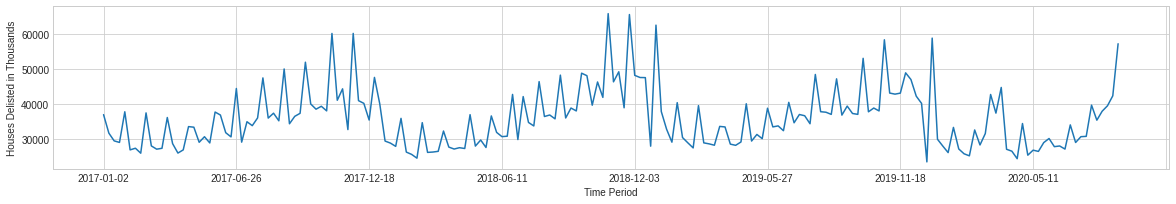

In [ ]:
counties_homesdelisted['sum'].plot(figsize=(20,3))
plt.ylabel('Houses Delisted in Thousands')
plt.xlabel('Time Period')

In [39]:
total_year = df2.pivot_table(index='Year', columns='region_name', values='total_homes_sold', aggfunc='sum')
total_year['sum'] = total_year.sum(numeric_only=True, axis=1)
total_year.head()

region_name,"Aberdeen, WA metro area","Abilene, TX metro area","Adair County, OK","Adams County, CO","Adams County, ID","Adams County, OH","Adams County, PA","Adams County, WI","Addison County, VT","Adrian, MI metro area","Aitkin County, MN","Akron, OH metro area","Alameda County, CA","Albany County, NY","Albany, NY metro area","Albany, OR metro area","Albemarle, NC metro area","Albert Lea, MN metro area","Albertville, AL metro area","Alexander County, NC","Alexandria, MN metro area","Alexandria, VA","Alice, TX metro area",All Redfin Metros,"Allegan County, MI","Allegany County, MD","Allegany County, NY","Allegheny County, PA","Allentown, PA metro area","Alma, MI metro area","Amador County, CA","Amsterdam, NY metro area","Anaheim, CA metro area","Anchorage Borough, AK","Anchorage, AK metro area","Anderson County, KY","Anderson County, SC","Anderson County, TN","Andrew County, MO","Androscoggin County, ME",...,"Wilmington, DE metro area","Wilmington, OH metro area","Wilson County, TN","Winchester, VA","Winchester, VA metro area","Windham County, CT","Windham County, VT","Windsor County, VT","Winnebago County, IL","Winnebago County, WI","Winnemucca, NV metro area","Winona County, MN","Winona, MN metro area","Winston-Salem, NC metro area","Wisconsin Rapids, WI metro area","Wolfe County, KY","Wood County, WI","Woodford County, KY","Woodruff County, AR","Wooster, OH metro area","Worcester County, MA","Worcester County, MD","Worcester, MA metro area","Worthington, MN metro area","Wright County, MN","Wyandotte County, KS","Wyoming County, NY","Yadkin County, NC","Yamhill County, OR","Yancey County, NC","Yellow Medicine County, MN","Yolo County, CA","York County, ME","York County, PA","York County, VA","York, PA metro area","Young County, TX","Youngstown, OH metro area","Yuma County, CO",sum
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01,80.0,146.0,NaN,598.0,NaN,4.0,75.0,28.0,24.0,98.0,16.0,578.0,797.0,242.0,726.0,168.0,41.0,17.0,NaN,NaN,9.0,153.0,NaN,223550.0,87.0,45.0,22.0,936.0,615.0,NaN,26.0,24.0,2165.0,268.0,389.0,20.0,149.0,11.0,NaN,68.0,...,602.0,20.0,195.0,24.0,130.0,130.0,48.0,54.0,127.0,113.0,NaN,8.0,8.0,593.0,51.0,NaN,51.0,19.0,NaN,37.0,685.0,123.0,815.0,NaN,137.0,101.0,19.0,3.0,115.0,23.0,NaN,140.0,238.0,385.0,45.0,385.0,6.0,331.0,NaN,618215.0
2017-02,67.0,153.0,NaN,497.0,NaN,7.0,72.0,19.0,10.0,76.0,9.0,547.0,765.0,170.0,515.0,104.0,48.0,22.0,NaN,NaN,13.0,170.0,NaN,210808.0,68.0,30.0,21.0,798.0,557.0,NaN,33.0,19.0,1982.0,201.0,306.0,17.0,161.0,51.0,NaN,50.0,...,543.0,21.0,191.0,NaN,123.0,101.0,39.0,62.0,142.0,96.0,NaN,24.0,24.0,523.0,42.0,NaN,42.0,9.0,NaN,60.0,566.0,131.0,667.0,NaN,93.0,121.0,14.0,4.0,112.0,4.0,2.0,112.0,165.0,390.0,35.0,390.0,3.0,287.0,NaN,576795.0
2017-03,84.0,187.0,NaN,644.0,NaN,10.0,106.0,20.0,21.0,68.0,4.0,661.0,1040.0,196.0,658.0,134.0,55.0,20.0,NaN,NaN,2.0,202.0,1.0,257810.0,98.0,20.0,17.0,1095.0,721.0,NaN,50.0,26.0,2516.0,261.0,381.0,22.0,204.0,20.0,NaN,71.0,...,706.0,34.0,252.0,11.0,120.0,99.0,44.0,70.0,142.0,157.0,NaN,34.0,34.0,668.0,62.0,NaN,62.0,27.0,NaN,44.0,583.0,192.0,682.0,NaN,183.0,139.0,6.0,8.0,134.0,16.0,7.0,126.0,236.0,498.0,53.0,498.0,4.0,385.0,NaN,704681.0
2017-04,90.0,195.0,NaN,717.0,NaN,3.0,100.0,34.0,1.0,86.0,13.0,758.0,1122.0,221.0,714.0,132.0,23.0,19.0,NaN,NaN,6.0,258.0,NaN,279942.0,119.0,67.0,20.0,1232.0,810.0,NaN,23.0,21.0,2682.0,307.0,454.0,20.0,227.0,19.0,NaN,88.0,...,797.0,42.0,269.0,19.0,209.0,123.0,43.0,77.0,177.0,194.0,NaN,35.0,35.0,767.0,51.0,NaN,51.0,29.0,NaN,56.0,738.0,250.0,861.0,NaN,207.0,179.0,11.0,9.0,87.0,12.0,NaN,176.0,235.0,497.0,37.0,497.0,5.0,390.0,NaN,766117.0
2017-05,135.0,248.0,NaN,870.0,NaN,9.0,98.0,49.0,26.0,135.0,33.0,1072.0,1556.0,337.0,1026.0,179.0,70.0,39.0,NaN,NaN,NaN,317.0,NaN,375943.0,158.0,63.0,42.0,1751.0,1088.0,NaN,74.0,32.0,3434.0,416.0,597.0,20.0,295.0,82.0,NaN,123.0,...,993.0,46.0,321.0,23.0,239.0,152.0,75.0,113.0,236.0,301.0,NaN,44.0,44.0,1024.0,93.0,NaN,93.0,31.0,NaN,57.0,1059.0,296.0,1211.0,2.

Text(0.5, 0, 'Time Period')

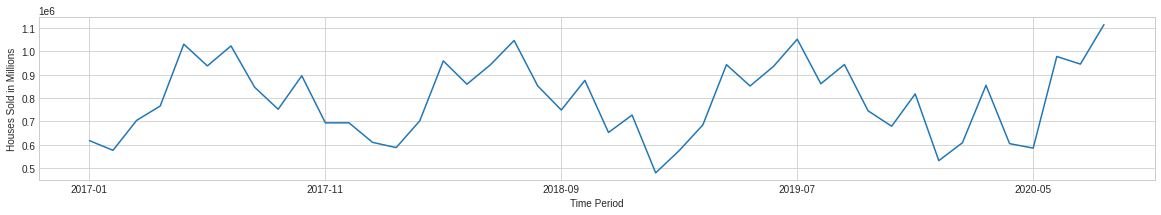

In [33]:
total_year['sum'].plot(figsize=(20,3))
plt.ylabel('Houses Sold in Millions')
plt.xlabel('Time Period')

In [42]:
inventory_year = df2.pivot_table(index='Year', columns='region_name', values='inventory', aggfunc='sum')
inventory_year['sum'] = inventory_year.sum(numeric_only=True, axis=1)
inventory_year

region_name,"Aberdeen, WA metro area","Abilene, TX metro area","Adair County, OK","Adams County, CO","Adams County, ID","Adams County, OH","Adams County, PA","Adams County, WI","Addison County, VT","Adrian, MI metro area","Aitkin County, MN","Akron, OH metro area","Alameda County, CA","Albany County, NY","Albany, NY metro area","Albany, OR metro area","Albemarle, NC metro area","Albert Lea, MN metro area","Albertville, AL metro area","Alexander County, NC","Alexandria, MN metro area","Alexandria, VA","Alice, TX metro area",All Redfin Metros,"Allegan County, MI","Allegany County, MD","Allegany County, NY","Allegheny County, PA","Allentown, PA metro area","Alma, MI metro area","Amador County, CA","Amsterdam, NY metro area","Anaheim, CA metro area","Anchorage Borough, AK","Anchorage, AK metro area","Anderson County, KY","Anderson County, SC","Anderson County, TN","Andrew County, MO","Androscoggin County, ME",...,"Wilmington, DE metro area","Wilmington, OH metro area","Wilson County, TN","Winchester, VA","Winchester, VA metro area","Windham County, CT","Windham County, VT","Windsor County, VT","Winnebago County, IL","Winnebago County, WI","Winnemucca, NV metro area","Winona County, MN","Winona, MN metro area","Winston-Salem, NC metro area","Wisconsin Rapids, WI metro area","Wolfe County, KY","Wood County, WI","Woodford County, KY","Woodruff County, AR","Wooster, OH metro area","Worcester County, MA","Worcester County, MD","Worcester, MA metro area","Worthington, MN metro area","Wright County, MN","Wyandotte County, KS","Wyoming County, NY","Yadkin County, NC","Yamhill County, OR","Yancey County, NC","Yellow Medicine County, MN","Yolo County, CA","York County, ME","York County, PA","York County, VA","York, PA metro area","Young County, TX","Youngstown, OH metro area","Yuma County, CO",sum
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01,1970.0,3091.0,NaN,3257.0,NaN,253.0,2386.0,1270.0,903.0,1764.0,563.0,12663.0,5008.0,4168.0,15880.0,1851.0,1511.0,421.0,NaN,NaN,231.0,1706.0,NaN,4297783.0,1802.0,1933.0,892.0,26445.0,13715.0,NaN,327.0,770.0,31323.0,6510.0,10171.0,362.0,4395.0,311.0,NaN,1796.0,...,15617.0,597.0,3635.0,236.0,2772.0,2280.0,2894.0,3689.0,2696.0,3039.0,NaN,134.0,134.0,13070.0,1416.0,NaN,1416.0,354.0,NaN,716.0,9978.0,5732.0,12258.0,NaN,2030.0,2275.0,427.0,101.0,1235.0,1084.0,NaN,1112.0,4721.0,9239.0,1329.0,9239.0,158.0,8805.0,NaN,11896292.0
2017-02,1157.0,2515.0,NaN,2563.0,NaN,245.0,1895.0,1055.0,518.0,1493.0,433.0,10271.0,4444.0,3250.0,12229.0,1451.0,1253.0,331.0,NaN,NaN,217.0,1588.0,NaN,3523654.0,1472.0,1603.0,515.0,21732.0,10988.0,NaN,342.0,634.0,26811.0,5590.0,8638.0,271.0,3727.0,951.0,NaN,1017.0,...,12632.0,317.0,3035.0,NaN,2263.0,1734.0,2230.0,2992.0,2034.0,2606.0,NaN,514.0,514.0,10760.0,1162.0,NaN,1162.0,284.0,NaN,967.0,7637.0,4831.0,9371.0,NaN,1333.0,1873.0,444.0,203.0,800.0,428.0,42.0,919.0,3595.0,7237.0,883.0,7237.0,76.0,7048.0,NaN,9729249.0
2017-03,1530.0,2562.0,NaN,2842.0,NaN,242.0,1890.0,1116.0,771.0,1189.0,159.0,10605.0,4750.0,3168.0,12093.0,1520.0,1306.0,373.0,NaN,NaN,113.0,1741.0,83.0,3641342.0,1448.0,805.0,680.0,22863.0,10817.0,NaN,460.0,468.0,28757.0,6032.0,9348.0,370.0,3810.0,313.0,NaN,1341.0,...,12879.0,653.0,2998.0,209.0,2287.0,1653.0,2165.0,3090.0,2015.0,2829.0,NaN,577.0,577.0,11176.0,1257.0,NaN,1257.0,279.0,NaN,683.0,7707.0,4985.0,9360.0,NaN,2091.0,1861.0,230.0,296.0,749.0,618.0,83.0,988.0,3633.0,7263.0,1259.0,7263.0,255.0,7141.0,NaN,10038242.0
2017-04,1570.0,2653.0,NaN,2862.0,NaN,176.0,1918.0,1256.0,202.0,1654.0,404.0,10834.0,5204.0,3174.0,12049.0,1599.0,635.0,444.0,NaN,NaN,111.0,1872.0,NaN,3767559.0,1132.0,1638.0,827.0,23422.0,11213.0,NaN,129.0,460.0,30784.0,6762.0,10346.0,394.0,3815.0,303.0,NaN,1360.0,...,13350.0,690.0,3046.0,151.0,2458.0,1719.0,2071.0,2992.0,2044.0,3033.0,NaN,655.0,655.0,11135.0,992.0,NaN,992.0,398.0,NaN,679.0,8239.0,4921.0,9958.0,NaN,2165.0,1841.0,352.0,176.0,540.0,421.0,NaN,1061.0,3831.0,7399.0,666.0,7399.0,176.0,7246.0,NaN,10358723.0

Text(0.5, 0, 'Time Period')

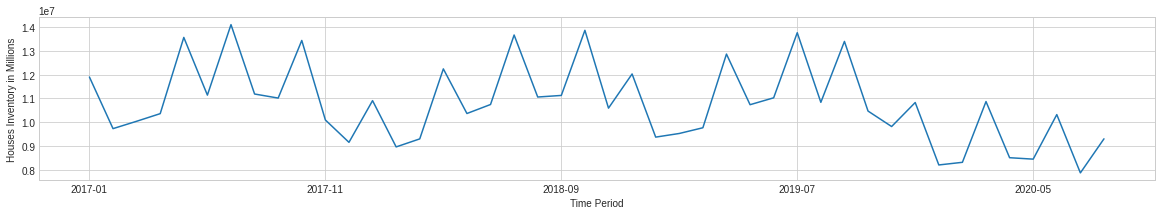

In [35]:
inventory_year['sum'].plot(figsize=(20,3))
plt.ylabel('Houses Inventory in Millions')
plt.xlabel('Time Period')

In [45]:
deslisted_year = df2.pivot_table(index='Year', columns='region_name', values='homes_delisted', aggfunc='sum')
deslisted_year['sum'] = deslisted_year.sum(numeric_only=True, axis=1)
deslisted_year

region_name,"Aberdeen, WA metro area","Abilene, TX metro area","Adair County, OK","Adams County, CO","Adams County, ID","Adams County, OH","Adams County, PA","Adams County, WI","Addison County, VT","Adrian, MI metro area","Aitkin County, MN","Akron, OH metro area","Alameda County, CA","Albany County, NY","Albany, NY metro area","Albany, OR metro area","Albemarle, NC metro area","Albert Lea, MN metro area","Albertville, AL metro area","Alexander County, NC","Alexandria, MN metro area","Alexandria, VA","Alice, TX metro area",All Redfin Metros,"Allegan County, MI","Allegany County, MD","Allegany County, NY","Allegheny County, PA","Allentown, PA metro area","Alma, MI metro area","Amador County, CA","Amsterdam, NY metro area","Anaheim, CA metro area","Anchorage Borough, AK","Anchorage, AK metro area","Anderson County, KY","Anderson County, SC","Anderson County, TN","Andrew County, MO","Androscoggin County, ME",...,"Wilmington, DE metro area","Wilmington, OH metro area","Wilson County, TN","Winchester, VA","Winchester, VA metro area","Windham County, CT","Windham County, VT","Windsor County, VT","Winnebago County, IL","Winnebago County, WI","Winnemucca, NV metro area","Winona County, MN","Winona, MN metro area","Winston-Salem, NC metro area","Wisconsin Rapids, WI metro area","Wolfe County, KY","Wood County, WI","Woodford County, KY","Woodruff County, AR","Wooster, OH metro area","Worcester County, MA","Worcester County, MD","Worcester, MA metro area","Worthington, MN metro area","Wright County, MN","Wyandotte County, KS","Wyoming County, NY","Yadkin County, NC","Yamhill County, OR","Yancey County, NC","Yellow Medicine County, MN","Yolo County, CA","York County, ME","York County, PA","York County, VA","York, PA metro area","Young County, TX","Youngstown, OH metro area","Yuma County, CO",sum
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01,23.0,46.0,NaN,36.0,NaN,5.0,18.0,13.0,16.0,29.0,9.0,207.0,116.0,63.0,250.0,13.0,24.0,7.0,NaN,NaN,2.0,22.0,NaN,55744.0,33.0,27.0,10.0,163.0,235.0,NaN,4.0,7.0,428.0,71.0,109.0,5.0,62.0,1.0,NaN,37.0,...,221.0,14.0,51.0,7.0,38.0,53.0,25.0,51.0,85.0,43.0,NaN,1.0,1.0,187.0,15.0,NaN,15.0,10.0,NaN,13.0,207.0,40.0,260.0,NaN,27.0,21.0,7.0,2.0,12.0,31.0,NaN,24.0,97.0,95.0,17.0,95.0,3.0,101.0,NaN,165250.0
2017-02,15.0,26.0,NaN,38.0,NaN,7.0,16.0,9.0,7.0,15.0,3.0,126.0,84.0,51.0,181.0,16.0,12.0,6.0,NaN,NaN,2.0,18.0,NaN,39894.0,19.0,17.0,7.0,161.0,141.0,NaN,6.0,7.0,310.0,54.0,73.0,6.0,37.0,4.0,NaN,9.0,...,124.0,4.0,44.0,NaN,27.0,28.0,18.0,21.0,39.0,13.0,NaN,6.0,6.0,98.0,6.0,NaN,6.0,5.0,NaN,10.0,134.0,32.0,162.0,NaN,10.0,20.0,9.0,4.0,13.0,3.0,1.0,16.0,36.0,48.0,10.0,48.0,1.0,75.0,NaN,117957.0
2017-03,13.0,27.0,NaN,20.0,NaN,4.0,23.0,8.0,5.0,9.0,1.0,128.0,89.0,42.0,138.0,16.0,14.0,7.0,NaN,NaN,1.0,32.0,6.0,40317.0,11.0,6.0,15.0,122.0,162.0,NaN,9.0,8.0,313.0,57.0,83.0,6.0,41.0,1.0,NaN,15.0,...,147.0,12.0,43.0,7.0,35.0,14.0,30.0,23.0,40.0,53.0,NaN,5.0,5.0,84.0,5.0,NaN,5.0,5.0,NaN,11.0,121.0,36.0,135.0,NaN,16.0,15.0,2.0,5.0,8.0,8.0,4.0,13.0,44.0,68.0,10.0,68.0,5.0,77.0,NaN,118894.0
2017-04,14.0,30.0,NaN,56.0,NaN,2.0,19.0,7.0,1.0,19.0,4.0,111.0,92.0,31.0,118.0,8.0,6.0,5.0,NaN,NaN,2.0,19.0,NaN,39162.0,13.0,19.0,21.0,298.0,152.0,NaN,2.0,6.0,325.0,48.0,75.0,9.0,32.0,1.0,NaN,12.0,...,134.0,5.0,31.0,2.0,27.0,19.0,28.0,20.0,22.0,24.0,NaN,7.0,7.0,82.0,8.0,NaN,8.0,7.0,NaN,11.0,128.0,30.0,147.0,NaN,21.0,8.0,5.0,5.0,8.0,2.0,NaN,17.0,48.0,54.0,8.0,54.0,4.0,82.0,NaN,115384.0
2017-05,17.0,40.0,NaN,40.0,NaN,2.0,13.0,7.0,15.0,23.0,9.0,164.0,142.0,50.0,209.0,16.0,11.0,9.0,NaN,NaN,NaN,45.0,NaN,54257.0,22.0,30.0,4.0,192.0,189.0,NaN,9.0,10.0,467.0,77.0,108.0,3.0,53.0,5.0,NaN,16.0,...,165.0,12.0,63.0,4.0,29.0,22.0,31.0,37.0,53.0,34.0,NaN,3.0,3.0,112.0,10.0,NaN,10.0,7.0,NaN,8.0,150.0,45.0,172.0,1.0,35.0,25.0,6.0,3.0,9.0,7.0,3.0,27.0,73.0,62.0,18.0,62.0,5.0,94.0,NaN,160015.0
2017-06,22.0,28.0,NaN,40.0,NaN,5.0,13.0,6.0,4.0,9.0,13.0,132.0,99.0,46.0,147.0,12.0,12.0,8.0,NaN,NaN,2.0,36.0,NaN,48701.0,11.0,

Text(0.5, 0, 'Time Period')

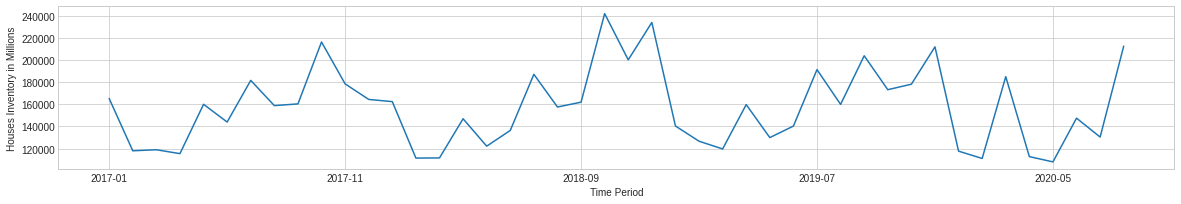

In [44]:
deslisted_year['sum'].plot(figsize=(20,3))
plt.ylabel('Houses Inventory in Millions')
plt.xlabel('Time Period')